## **Loading the required libraries**

In [1]:
import pandas as pd #Library for data manipulation
import numpy as np #provides ndarrays and for statistics
import statistics as sts #statistical requirements
import seaborn as sns #Visualisation
import matplotlib.pyplot as plt #Visualisation
import warnings
warnings.filterwarnings('ignore') #Ignores warning

%matplotlib inline

## **Loading the Obesity dataset**

In [2]:
#read the dataset
data = pd.read_csv('/content/Obesity.csv')

## **Exploratory Data Analysis (EDA)**

In [3]:
#Display the head and tail portions of the dataset
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
data.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
#Shape of data - gives number of rows and columns in data
data.shape

(2111, 17)

The dataset contains 2111 rows and 17 columns.

In [6]:
#Basic Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

Displays each of the column names and their respective datatypes along with non-null count.Here are 8 float type columns and 9 object type.

In [7]:
#Colums in the dataset
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [8]:
#Summary Statistics
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Displays the statistical measures like measures of central tendencies (only for numerical columns).

In [9]:
#Gives number of elements in the data
data.size

35887

### **Data Cleaning**

In [10]:
#Check for missing values
data.isna().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

Here we've missing values for the columns : Gender,Height,family_history_with_overweight,CAEC,SCC,MTRANS.And we use imputation method to overcome this.

In [11]:
# Imputation Method-Method of filling null values using mean,median or mode of respective columns.

data['Height'] = data['Height'].fillna(data['Height'].mean()) #Filling Height column using column mean
data['Gender'] = data['Gender'].fillna(data['Gender'].mode().iloc[0]) #Filling Gender column using column mode
data['family_history_with_overweight'] = data['family_history_with_overweight'].fillna(data['family_history_with_overweight'].mode().iloc[0])#Filling family_history_with_overweight column using column mode
data['CAEC'] = data['CAEC'].fillna(data['CAEC'].mode().iloc[0]) #Filling CAEC column using column mode
data['SCC'] = data['SCC'].fillna(data['SCC'].mode().iloc[0]) #Filling SCC column using column mode
data['MTRANS'] = data['MTRANS'].fillna(data['MTRANS'].mode().iloc[0]) #Filling MTRANS column using column mode


In [12]:
#check null values are removed
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

All the null values has been removed.

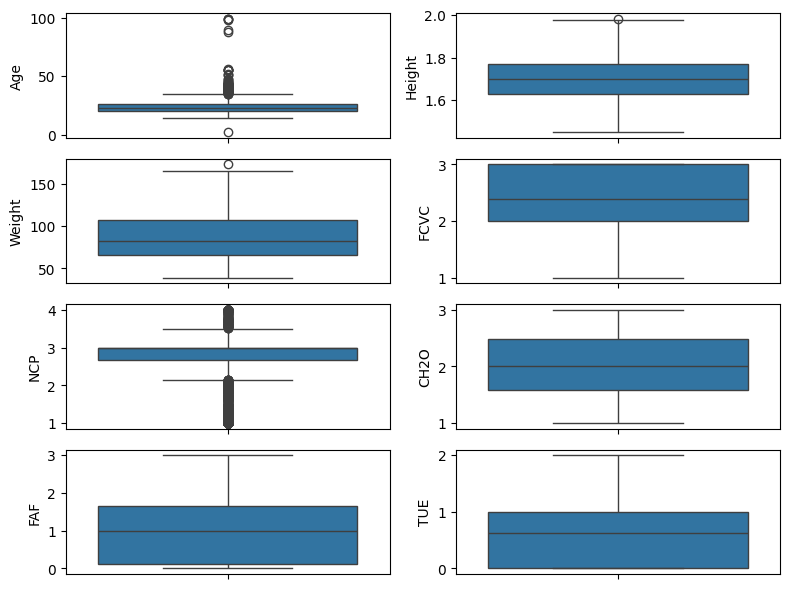

In [13]:
#Outlier Analysis

fig,axs = plt.subplots(4,2,figsize=(8,6))
plot1 = sns.boxplot(data['Age'],ax=axs[0,0])
plot2 = sns.boxplot(data['Height'],ax=axs[0,1])
plot3 = sns.boxplot(data['Weight'],ax=axs[1,0])
plot4 = sns.boxplot(data['FCVC'],ax=axs[1,1])
plot5 = sns.boxplot(data['NCP'],ax=axs[2,0])
plot6 = sns.boxplot(data['CH2O'],ax=axs[2,1])
plot7 = sns.boxplot(data['FAF'],ax=axs[3,0])
plot8 = sns.boxplot(data['TUE'],ax=axs[3,1])

plt.tight_layout()

Its clear that the Age and NCP columns contains most of outliers.

In [14]:
#Treating outliers

from scipy.stats import zscore
z_scr = (zscore(data[['Age','NCP']]))
threshold = 3
outlier_mask = (abs(z_scr)>threshold).any(axis = 1)
new_data = data[~outlier_mask]

In [15]:
outlier_mask.sum()

18

Outliers has been removed.

In [16]:
#Check for Duplicates
new_data.duplicated().sum()



23

Data contains 23 duplicated rows

### **Data Visualisation **

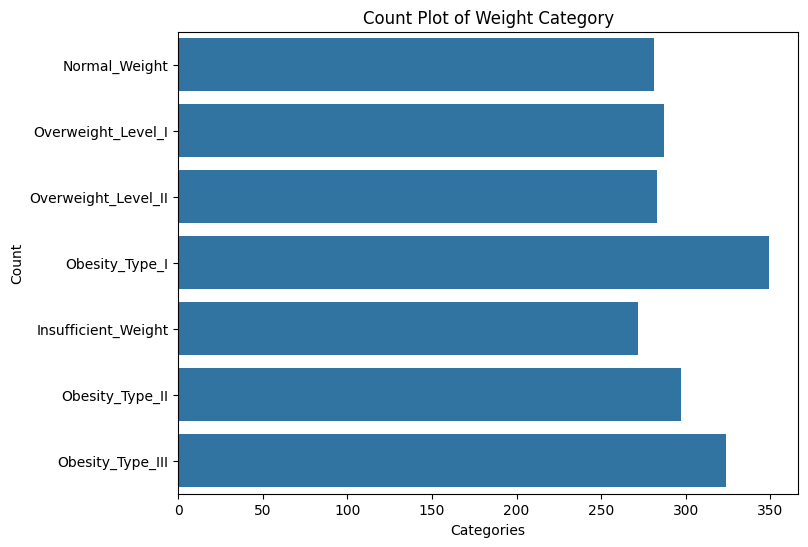

In [17]:
#Univariate Analysis

plt.figure(figsize=(8, 6))
sns.countplot(new_data['NObeyesdad'])
plt.title('Count Plot of Weight Category')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

There are 7 different weight categories.

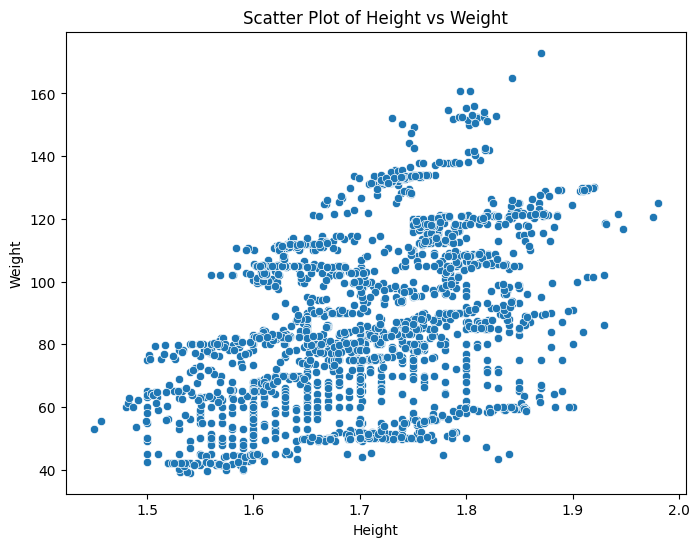

In [18]:
#Bivariate Analysis

plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_data, x='Height', y='Weight')
plt.title('Scatter Plot of Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Least positive correlation between height and weight.

## **Data Preprocessing**

In [19]:
new_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### **Encoding**

In [20]:
#Encoding
features_to_one_hot_encode = ['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']

# One-hot encode categorical columns
dummy_variables = pd.get_dummies(new_data[features_to_one_hot_encode])

features_to_label = ['CAEC','CALC','MTRANS','NObeyesdad']
from sklearn.preprocessing import LabelEncoder
# Label encode features
#create instance
encoder = LabelEncoder()
new_data['CAEC']=encoder.fit_transform(new_data['CAEC'])
new_data['CALC']=encoder.fit_transform(new_data['CALC'])
new_data['MTRANS']=encoder.fit_transform(new_data['MTRANS'])
new_data['NObeyesdad']=encoder.fit_transform(new_data['NObeyesdad'])

# Concatenate one-hot encoded features, label encoded features, and the remaining columns
encoded_df = pd.concat([dummy_variables,new_data.drop(features_to_one_hot_encode, axis=1)], axis=1)



In [21]:
encoded_df.head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,...,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,0,0,1,1,0,1,0,1,0,...,64.0,2.0,3.0,2,2.0,0.0,1.0,3,3,1
1,1,0,0,1,1,0,0,1,0,1,...,56.0,3.0,3.0,2,3.0,3.0,0.0,2,3,1
2,0,1,0,1,1,0,1,0,1,0,...,77.0,2.0,3.0,2,2.0,2.0,1.0,1,3,1
3,0,1,1,0,1,0,1,0,1,0,...,87.0,3.0,3.0,2,2.0,2.0,0.0,1,4,5
4,0,1,1,0,1,0,1,0,1,0,...,89.8,2.0,1.0,2,2.0,0.0,0.0,2,3,6


### **Scaling**

In [33]:
#we scale features other than the one hot encoded
features_to_scale = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE','CAEC','CALC','MTRANS','NObeyesdad']

#Using standard scaler
from sklearn.preprocessing import StandardScaler
# cREATE instance
scaler = StandardScaler()
# Scale selected features
scaled_features = scaler.fit_transform(encoded_df)

df_scaled = pd.DataFrame(scaled_features,columns = encoded_df.columns)

<Axes: >

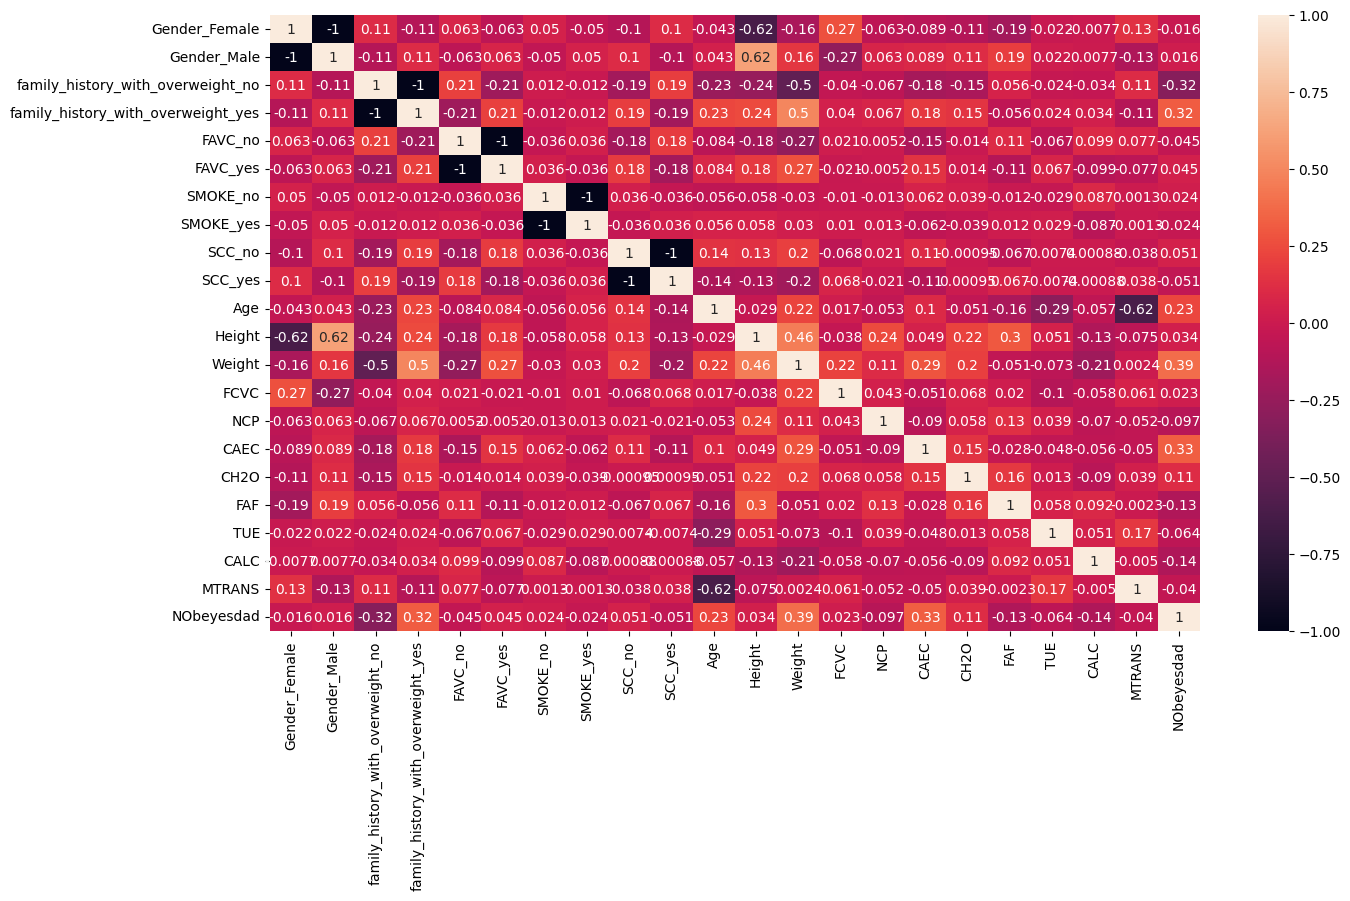

In [36]:
#Heat map for correlation and feature importance

plt.figure(figsize=(15, 8))
sns.heatmap(df_scaled.corr(),annot=True)

### **Creating Feature and target variables**

In [56]:
y = pd.DataFrame(encoder.fit_transform(new_data['NObeyesdad']))#target

In [57]:
X = df_scaled.drop(['NObeyesdad'],axis = 1)#feature variable

print(X.shape)
print(y.shape)

X = np.array(X)
y = np.array(y)



(2093, 21)
(2093, 1)


### Creating Train and Test dataset

In [58]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25,shuffle = True)



### **Building Model**

In [59]:
#USING RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

#create instace of model
model = RandomForestClassifier()
#fit model
rf_model = model.fit(X_train,y_train)
#Prediction
rf_pred = model.predict(X_test)



### **Evaluation**

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

print('Accuracy :',accuracy_score(y_test,rf_pred))
print('Confusion MATRIX :\n',confusion_matrix(y_test,rf_pred))

Accuracy : 0.9389312977099237
Confusion MATRIX :
 [[61  9  0  0  0  0  0]
 [ 1 73  0  0  0  1  0]
 [ 0  1 72  1  0  1  0]
 [ 0  0  0 88  1  0  0]
 [ 0  0  0  1 76  0  0]
 [ 0  6  0  0  0 55  1]
 [ 0  4  1  0  0  4 67]]


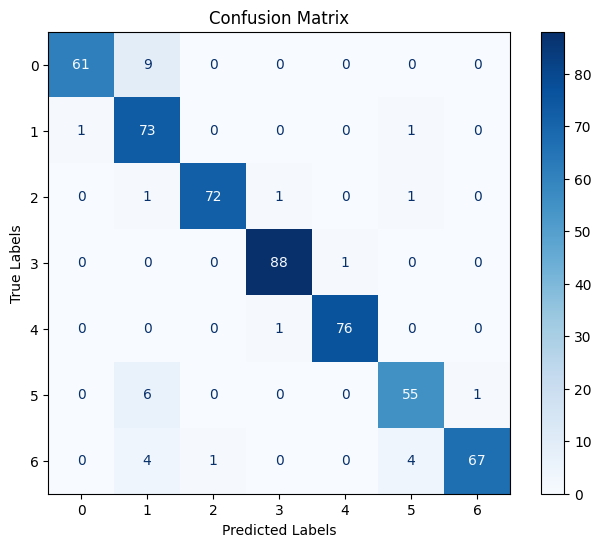

In [65]:
#Confusion Matrix Display

# Create ConfusionMatrixDisplay object

class_labels = np.unique(new_data['NObeyesdad'])

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,rf_pred), display_labels=class_labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## **hyper parameter tuning**

In [66]:
# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross-Validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)
print("Best score:",grid_search.best_score_)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9388145315487572


Inference : Random forest classifier has an accuracy of 0.9388145315487572 with best parameters  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}